In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
raw_data = pd.read_csv("GDP_Dataset.csv")

In [4]:
raw_data

,date,GDP,Per Capita,Growthannualchange
0,31/12/1960,3.749265,81.5869,NaN
1,31/12/1961,4.118648,87.5174,5.9873
2,31/12/1962,4.310164,89.4933,4.4829
3,31/12/1963,4.630827,93.8839,8.6888
4,31/12/1964,5.204956,102.9612,7.5698
...,...,...,...,...
58,31/12/2018,356.128225,1620.7429,6.1517
59,31/12/2019,320.909489,1437.1659,2.4976
60,31/12/2020,300.425667,1322.3150,-1.2741
61,31/12/2021,348.262545,1505.0102,6.4871


In [13]:
raw_data.dtypes

date                    object
 GDP                   float64
 Per Capita            float64
 Growthannualchange    float64
dtype: object

In [17]:
lis = raw_data[["date"]]
lis

,date
0,31/12/1960
1,31/12/1961
2,31/12/1962
3,31/12/1963
4,31/12/1964
...,...
58,31/12/2018
59,31/12/2019
60,31/12/2020
61,31/12/2021


In [24]:
def extract_last_4_chars(value):
    return value[-4:]

raw_data['date'] = raw_data['date'].apply(extract_last_4_chars)

raw_data["date"] = raw_data["date"].astype(int)

print(raw_data)

    date         GDP   Per Capita   Growthannualchange
0   1960    3.749265      81.5869                  NaN
1   1961    4.118648      87.5174               5.9873
2   1962    4.310164      89.4933               4.4829
3   1963    4.630827      93.8839               8.6888
4   1964    5.204956     102.9612               7.5698
..   ...         ...          ...                  ...
58  2018  356.128225    1620.7429               6.1517
59  2019  320.909489    1437.1659               2.4976
60  2020  300.425667    1322.3150              -1.2741
61  2021  348.262545    1505.0102               6.4871
62  2022  414.885900    1579.2250               4.9312

[63 rows x 4 columns]


In [25]:
raw_data.dtypes

date                     int32
 GDP                   float64
 Per Capita            float64
 Growthannualchange    float64
dtype: object

In [26]:
raw_data.isnull().sum()

date                   0
 GDP                   0
 Per Capita            0
 Growthannualchange    1
dtype: int64

In [27]:
raw_data.replace(np.nan, 0)

,date,GDP,Per Capita,Growthannualchange
0,1960,3.749265,81.5869,0.0000
1,1961,4.118648,87.5174,5.9873
2,1962,4.310164,89.4933,4.4829
3,1963,4.630827,93.8839,8.6888
4,1964,5.204956,102.9612,7.5698
...,...,...,...,...
58,2018,356.128225,1620.7429,6.1517
59,2019,320.909489,1437.1659,2.4976
60,2020,300.425667,1322.3150,-1.2741
61,2021,348.262545,1505.0102,6.4871


In [46]:
series = raw_data[" GDP"].values
time = raw_data["date"].values

In [65]:
split_time = 56

time_train = time[:split_time]
x_train = series[:split_time]

time_valid = time[split_time:]
x_valid = series[split_time:]

In [48]:
def plot_series(time, series, format="-", start=0, end=None):
    
    plt.figure(figsize=(10, 6))
    if type(series) is tuple:
      for series_num in series:
        plt.plot(time[start:end], series_num[start:end], format)
    else:
      plt.plot(time[start:end], series[start:end], format)

    plt.xlabel("Time")
    plt.ylabel("GDP")
    plt.grid(True)
    plt.show()

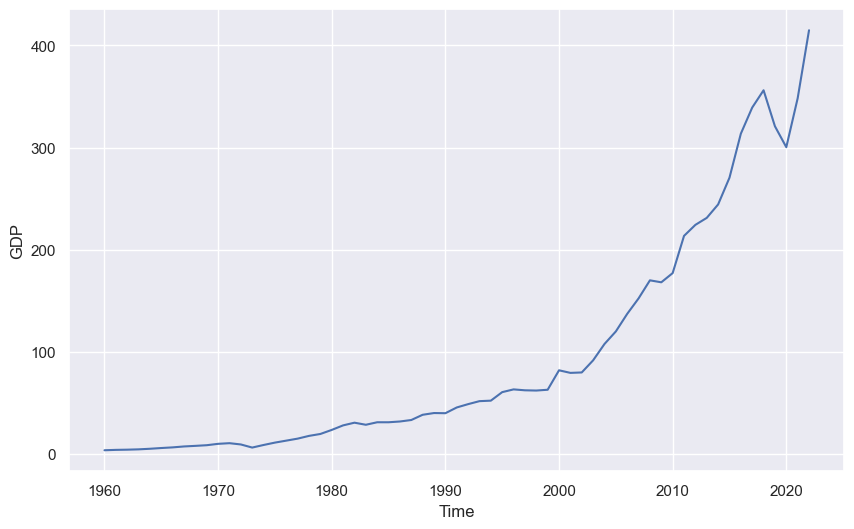

In [49]:
plot_series(raw_data["date"], raw_data[" GDP"])

In [76]:
naive_forecast = series[split_time - 1:-1]
time_step = 5

print(f'ground truth at time step {time_step}: {x_valid[time_step]}')
print(f'prediction at time step {time_step + 1}: {naive_forecast[time_step + 1]}')

ground truth at time step 5: 348.2625447
prediction at time step 6: 348.2625447


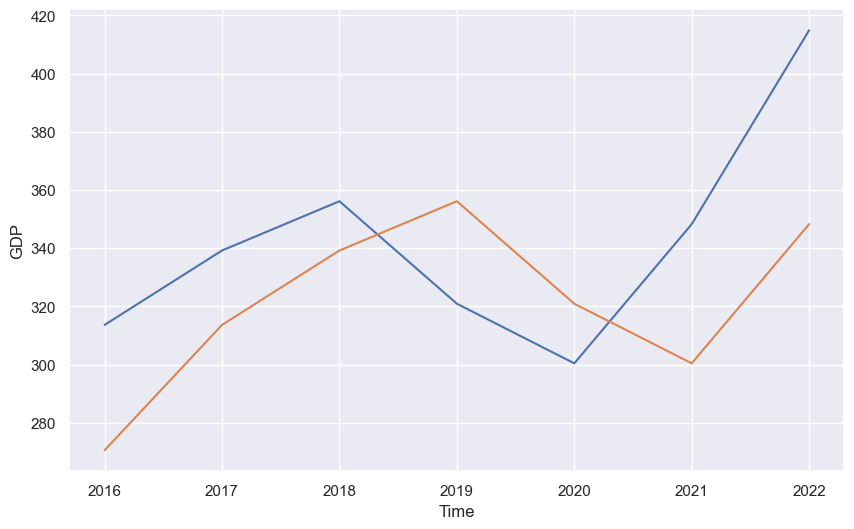

In [71]:
plot_series(time_valid, (x_valid, naive_forecast))

In [72]:
print(tf.keras.metrics.mean_squared_error(x_valid, naive_forecast).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, naive_forecast).numpy())

1597.5463868797617
36.53355495714286


In [77]:
def moving_average_forecast(series, window_size):

    forecast = []
    for time in range(len(series) - window_size):
      forecast.append(series[time:time + window_size].mean())

    forecast = np.array(forecast)

    return forecast

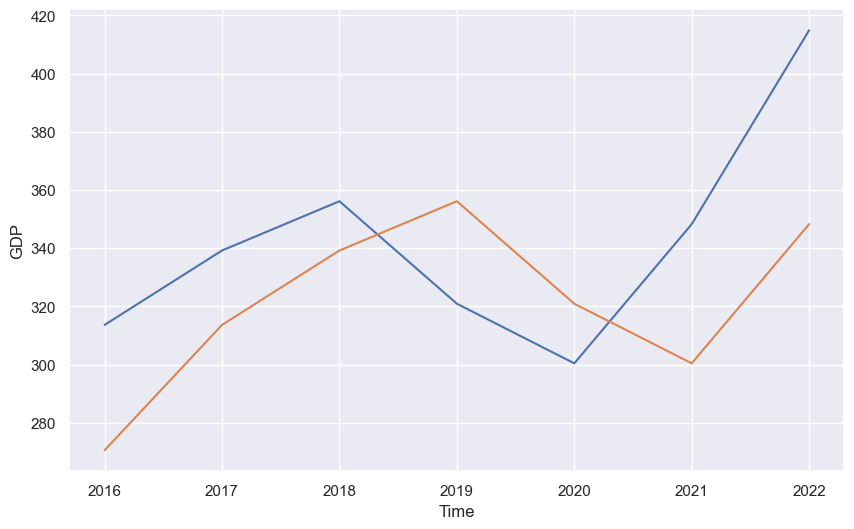

In [88]:
moving_avg = moving_average_forecast(series, 1)[split_time - 1:]

plot_series(time_valid, (x_valid, moving_avg))

In [89]:
print(tf.keras.metrics.mean_squared_error(x_valid, moving_avg).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, moving_avg).numpy())

1597.5463868797617
36.53355495714286


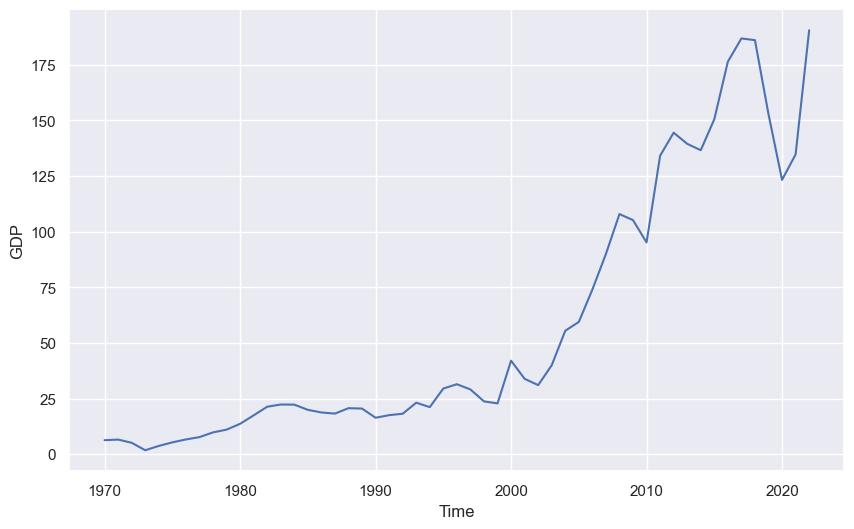

In [92]:
diff_series = (series[10:] - series[:-10])

diff_time = time[10:]

plot_series(diff_time, diff_series)

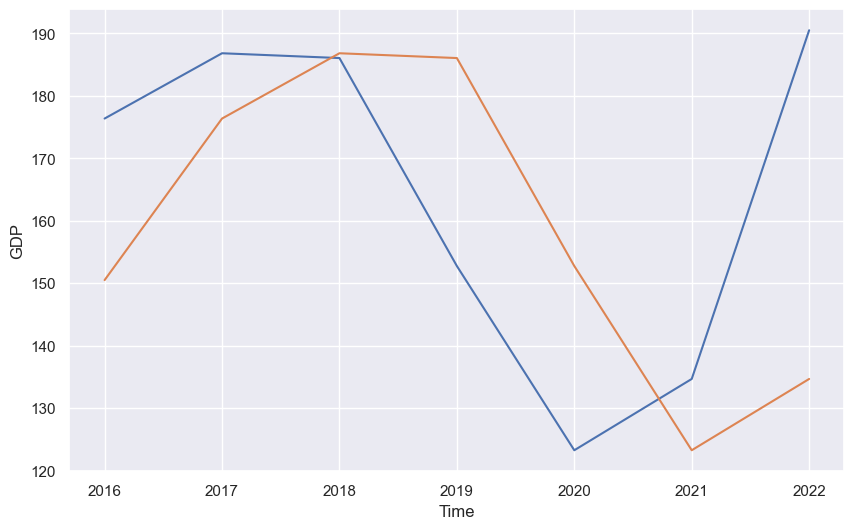

In [93]:
diff_moving_avg = moving_average_forecast(diff_series, 1)

diff_moving_avg = diff_moving_avg[split_time - 10 - 1:]

diff_series = diff_series[split_time - 10:]

plot_series(time_valid, (diff_series, diff_moving_avg))

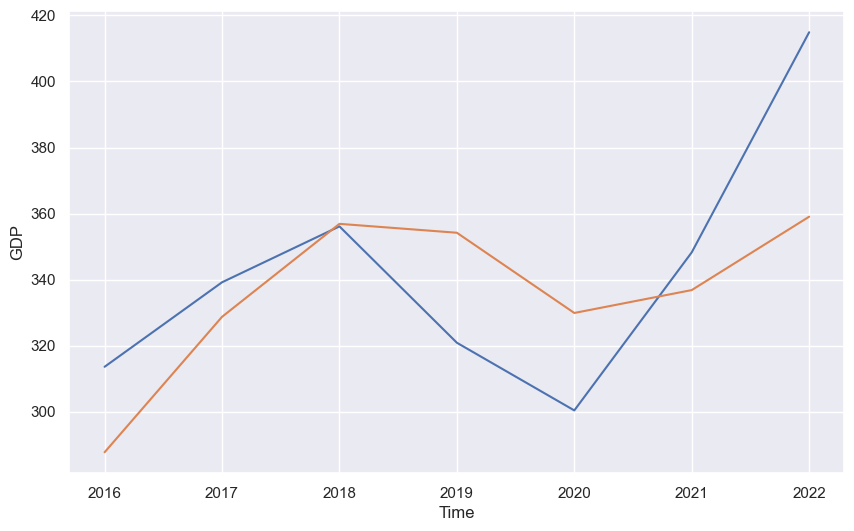

In [95]:
diff_moving_avg_plus_past = series[split_time - 10:-10] + diff_moving_avg
plot_series(time_valid, (x_valid, diff_moving_avg_plus_past))

In [96]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_past).numpy())

857.7679795816304
23.87445358571429


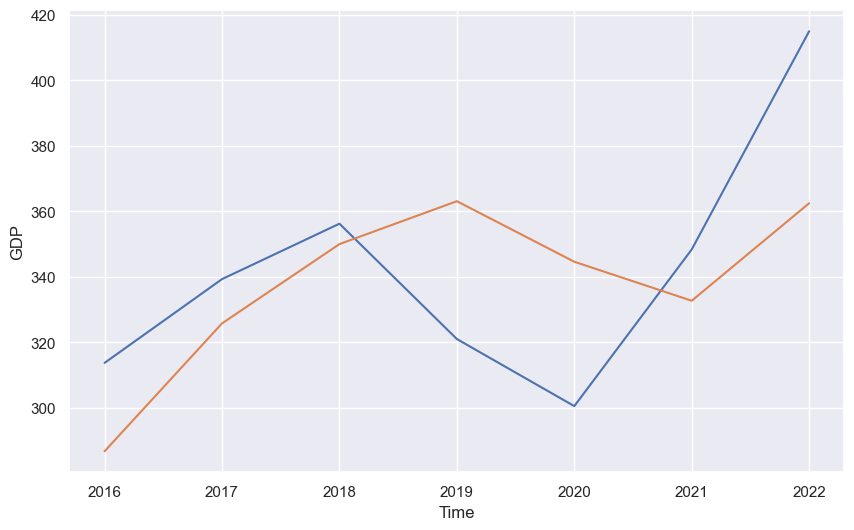

In [100]:
diff_moving_avg_plus_smooth_past = moving_average_forecast(series[split_time - 15:-4], 11) + diff_moving_avg

plot_series(time_valid, (x_valid, diff_moving_avg_plus_smooth_past))

In [101]:
print(tf.keras.metrics.mean_squared_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())
print(tf.keras.metrics.mean_absolute_error(x_valid, diff_moving_avg_plus_smooth_past).numpy())

1095.1898112270094
28.724576900519487
